## Homework 4

Use this notebook as a starter

Started code from: https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/04-evaluation/homework-4-starter.ipynb 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

Data:

- https://github.com/gastonstat/CreditScoring
- Also available [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv)

In [3]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
!"C:\Program Files (x86)\TeXmacs\bin\wget.exe" https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv

--2021-10-03 19:26:08--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: 'CreditScoring.csv.6'

     0K .......... .......... .......... .......... .......... 28% 1.54M 0s
    50K .......... .......... .......... .......... .......... 56% 5.78M 0s
   100K .......... .......... .......... .......... .......... 84% 6.57M 0s
   150K .......... .......... ........                        100% 5.86M=0.05s

2021-10-03 19:26:08 (3.33 MB/s) - 'CreditScoring.csv.6' saved [182489/182489]



## Preparation 

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [4]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

Some of the features are encoded as numbers. Use the following code to de-code them:

In [5]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables:

In [6]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [7]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [8]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

## Your code

What are the categorical variables? What are the numerical?

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] #https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
num_columns = df.select_dtypes(numerics).columns #10
cat_columns = df.select_dtypes(['object']).columns #4
df #14 all: ok

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020,1
4450,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263,0
4451,0,owner,24,37,married,no,partime,60,90,3500,0,500,963,1
4452,0,rent,48,23,single,no,freelance,49,140,0,0,550,550,0


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [10]:
np.random.seed(1) #seed RNG 1

#this time random_state = 1 not 42 (!)
from sklearn.model_selection import train_test_split
df_trainval, df_test = train_test_split(df, test_size=0.2, random_state=1) #split train+val [80%], test [20%]
df_train, df_val = train_test_split(df_trainval, test_size=0.25, random_state=1) #split train[60%] val [20%]

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [11]:
from sklearn.metrics import auc, roc_curve

seniority 0.709
time      0.560
income    0.682
debt      0.504


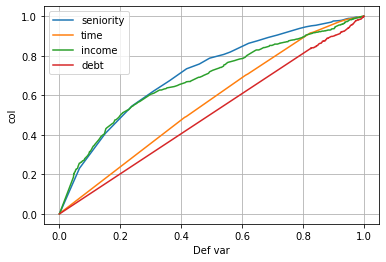

In [12]:
#num_columns
for col in ['seniority','time','income','debt']:
    fpr, tpr, thresholds = roc_curve(df_train['default'], df_train[col] )
    score = auc(fpr,tpr)
    
    if score < 0.5: 
        fpr, tpr, thresholds = roc_curve(df_train['default'], -df_train[col] )
        score = auc(fpr,tpr)

    plt.plot(fpr,tpr , label=col )
    print(col + (" "*(10-len(col))) + str(score)[:5]) #a little bit old-school python printing... 
    
plt.xlabel('Def var')
plt.ylabel('col')
plt.grid(True)
plt.legend()

Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

 **Q1: Seniority has the highest AUC**

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [13]:
#import DictVectorizer and prepare one and one-hot encode serializer
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False) #import encoder

#import roc auc 
from sklearn.metrics import roc_auc_score

#select the of interest train vars
sel_col = ['seniority', 'income', 'assets', 'records', 'job', 'home']
#tar_col =['default'] # took me 7 hours to figure that for some reason if I put this, it doesn't work. 
y_train = df_train['default'].values
y_val = df_val['default'].values
df_train = df_train[sel_col]
df_val = df_val[sel_col]

# Serialize non-numerical data using DictVectorizer (aka One-Hot Encoding)
train_dict = df_train.to_dict(orient='records') # get categorial variables from train db, sort them by x and put them into dictionary 
val_dict = df_val.to_dict(orient='records')
X_train = dv.fit_transform(train_dict) #one-hot encoding 
X_val = dv.fit_transform(val_dict)

#Create model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

#train model
model.fit(X_train,y_train)

#validate model
y_predict = model.predict_proba(X_val)[:, 1]

#get ROC AUC
print("ROC AUC: %2.3f" % round(roc_auc_score(y_val,y_predict),3))

ROC AUC: 0.812


* **Q2 -> 0.812**

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- 0.812

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

Threshold 0.40


<ipython-input-14-473aca574711>:32: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp+fp)*1.0


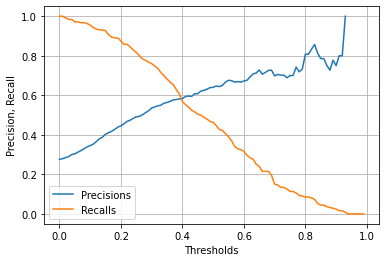

In [14]:
from sklearn.metrics import accuracy_score

# first analytics, best threshold 
thresholds = np.arange(0.0, 1.0, 0.01)
scores = [];
precisions = [];
recalls = [];

#reminders
#Precision: tp/(tp+fp) 
#Recall: tp/(tp+fn) (failed to identify)




eps = 1e-34

max_score = 0.0;
max_scoreth = -1;
for th in thresholds:
    #score = accuracy_score(y_val, y_predict >= th)
    #if max_score < score: max_score = score; max_scoreth = th

    y_pred_bin =  (y_predict >= th)
    tp = ((y_pred_bin == True) & (y_val == True)).sum()
    fp = ((y_pred_bin == True) & (y_val == False)).sum()
    fn = ((y_pred_bin == False) & (y_val == True)).sum()

    #print("%f\t%d\t%d\t%d" %(th,tp,fp,fn)) 
    
    
    precision = tp / (tp+fp)*1.0
    recall = tp / (tp+fn)*1.0
    precisions.append(precision)
    recalls.append(recall)
    scores.append(score)
    #print("%f\t%f\t%f" %(th,precision,recall))  #why is precision constant??? #solved: tar_col was giving, no

#plt.plot(thresholds,scores)
#plt.plot(max_scoreth,max_score,'kx')
#plt.text(max_scoreth,max_score*0.95,"(%2.3f, %2.3f)" % (max_scoreth,max_score),ha='center')
#plt.xlabel('Threshold')
#plt.ylabel('Score Accuracy')
#plt.grid(True)


plt.figure()
#precision and recall
plt.plot(thresholds,precisions,label='Precisions')
plt.plot(thresholds,recalls,label='Recalls')
plt.legend()
plt.xlabel('Thresholds')
plt.ylabel('Precision, Recall')
plt.grid()

#bi-section method
a = 0
b = len(thresholds)-1

while True:
    m = int(np.round((a+b)/2))
    
    fg_left =  precisions[a] - recalls[a]
    fg_right =  precisions[b] - recalls[b]
    fg_med =  precisions[m] - recalls[m]
    if np.sign(fg_left) == np.sign(fg_med):
        if a==m: break;
        a = m
    else:
        if b==m: break;
        b = m

print("Threshold %2.2f" % ((thresholds[a] + thresholds[b])/2))

* **Q3 --> 0.4**

At which threshold precision and recall curves intersect?

* 0.2
* 0.4
* 0.6
* 0.8

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

Maximum is 0.629 located at threshold 0.30


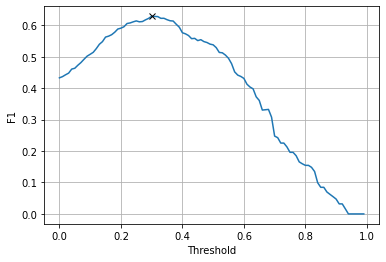

In [15]:
P = np.array(precisions)
R = np.array(recalls)

F1 = 2 * P*R/(P+R)
F1[np.isnan(F1)] = 0; #problem with isNaN

plt.plot(thresholds,F1)
my = F1.max()
mx = thresholds[F1.argmax()]

plt.plot(mx,my,'kx')
plt.xlabel('Threshold')
plt.ylabel('F1')
plt.grid(True)
print("Maximum is %2.3f located at threshold %2.2f" %(my,mx))


* **Q4->0.3**

At which threshold F1 is maximal?

- 0.1
- 0.3
- 0.5
- 0.7

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


In [48]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_trainval):
        y_train = df_trainval['default'].iloc[train_idx].values
        y_val = df_trainval['default'].iloc[val_idx].values
        df_train = df_trainval[sel_col].iloc[train_idx]
        df_val = df_trainval[sel_col].iloc[val_idx]



        dv = DictVectorizer(sparse=False) #import encoder
        train_dict = df_train.to_dict(orient='records')
        val_dict = df_val.to_dict(orient='records')
        X_train = dv.fit_transform(train_dict)
        X_val = dv.transform(val_dict)

        model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
        model.fit(X_train,y_train)

        y_predict = model.predict_proba(X_val)[:, 1]
        scores.append(roc_auc_score(y_val,y_predict))
      


#print(scores)
print("std dev: %1.5f" % (np.std(scores)))
    

[0.8256212256212256, 0.8254176350237372, 0.7893383818254285, 0.8250108084738436, 0.8054696294614563]
std dev: 0.01461


* **Q5->0.014**

How large is standard devidation of the scores across different folds?

- 0.001
- 0.014
- 0.09
- 0.14

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [60]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
Call = [0.01, 0.1, 1, 10]

all_stds=[]
all_scores=[]

for C in Call:
    scores = []
    for train_idx, val_idx in kfold.split(df_trainval):
        y_train = df_trainval['default'].iloc[train_idx].values
        y_val = df_trainval['default'].iloc[val_idx].values
        df_train = df_trainval[sel_col].iloc[train_idx]
        df_val = df_trainval[sel_col].iloc[val_idx]



        dv = DictVectorizer(sparse=False) #import encoder
        train_dict = df_train.to_dict(orient='records')
        val_dict = df_val.to_dict(orient='records')
        X_train = dv.fit_transform(train_dict)
        X_val = dv.transform(val_dict)

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train,y_train)

        y_predict = model.predict_proba(X_val)[:, 1]
        scores.append(roc_auc_score(y_val,y_predict))
    all_stds.append(np.std(scores))
    all_scores.append(np.mean(scores))
      

#print(["%.3f"  % m for m in all_scores])
#print(["%.3f" % s for s in all_stds])
for k in range(4):
    print("C=%.2f\tµ=%1.3f\ts=%1.3f"% (Call[k], round(all_scores[k],3),round(all_stds[k],3)))

#print("std dev: %2.4f" % (np.std(scores)))
    

C=0.01	µ=0.808	s=0.012
C=0.10	µ=0.813	s=0.014
C=1.00	µ=0.814	s=0.015
C=10.00	µ=0.814	s=0.015


* ** Q6: C=1 **

Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

## Submit the results

Submit your results here: https://forms.gle/e497sR5iB36mM9Cs5

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline

The deadline for submitting is 04 October 2021, 17:00 CET. After that, the form will be closed.